## Import Libraries for data preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

In [3]:
# Load data from csv
data = pd.read_csv(r'Data/Extracted_Features(Augmented).csv')
data.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,Energy,RMS Energy,Intensity,Tempo,aggressiveness
0,-529.325562,56.663666,-16.689976,10.855888,-11.516223,-2.507931,-7.963574,-9.494851,-8.698105,-0.036879,-6.527728,-0.497543,-8.345603,11.823792,0.008446,0.158349,129.199219,1
1,-291.862355,13.692000,0.721914,0.840946,-2.631608,-3.273398,-3.800516,-5.063510,-4.178277,-1.223973,-1.139944,-2.740711,-1.950979,13.449061,0.011196,0.161483,123.046875,1
2,-530.501648,57.164650,-16.692572,10.879096,-11.512814,-2.454381,-8.066333,-9.450629,-8.646166,0.025993,-6.529346,-0.396756,-8.387289,11.823791,0.008424,0.158349,129.199219,1
3,-541.681519,57.992699,-17.564571,11.296426,-11.792108,-2.114906,-8.049675,-9.406855,-8.593161,0.401956,-6.543359,-0.257982,-8.379411,8.426271,0.007133,0.157719,123.046875,1
4,-562.736572,57.957283,-18.055918,12.096211,-13.936737,-2.030675,-9.912500,-9.270649,-9.474069,0.901388,-6.269834,0.472650,-8.715702,5.479378,0.005587,0.093388,112.347147,1


In [4]:
# Devide to indipendant and dependant variables
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [5]:
# Split data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25,random_state=1)

In [6]:
# Split data into training and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

In [7]:
# Get the data count of unique labels
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))


{0: 6917, 1: 7096}

In [8]:
# Shape of the data
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((14013, 17), (2336, 17), (2336, 17), (14013,), (2336,), (2336,))

In [9]:
# Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [42]:
# import pickle
# # Save the scaler
# with open('Models//scaler_4(pro).pickle', 'wb') as f:
#     pickle.dump(sc, f)

In [11]:
# Shape of the data
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((14013, 17), (2336, 17), (2336, 17), (14013,), (2336,), (2336,))

In [12]:
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [13]:
# Shape of the data
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((14013, 17, 1), (2336, 17, 1), (2336, 17, 1), (14013,), (2336,), (2336,))

## Modeling

#### Import Libraries for Model

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [15]:
intializer = tf.keras.initializers.glorot_normal(seed=None)

In [16]:
model = Sequential()
model.add(Conv1D(128, 5,padding='same',
                input_shape=(17,1),kernel_initializer=intializer))
model.add(Activation('relu'))

model.add(Conv1D(512, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv1D(512, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv1D(512, 5,padding='same',kernel_initializer=intializer))
model.add(Flatten())

model.add(Dense(1))
model.add(Activation('sigmoid'))

d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 17, 128)           768       
                                                                 
 activation (Activation)     (None, 17, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 512)           328192    
                                                                 
 activation_1 (Activation)   (None, 17, 512)           0         
                                                                 
 dropout (Dropout)           (None, 17, 512)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 17, 128)           327808    
                                                                 
 activation_2 (Activation)   (None, 17, 128)           0

In [18]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              optimizer=Adam(learning_rate=0.000025))

In [19]:
model.fit(X_train,y_train,epochs=150,validation_data=(X_val,y_val),batch_size=128)

Epoch 1/150


110/110 [==============================] - 11s 93ms/step - loss: 0.6105 - accuracy: 0.7165 - val_loss: 0.3975 - val_accuracy: 0.8253
Epoch 2/150
110/110 [==============================] - 10s 88ms/step - loss: 0.3599 - accuracy: 0.8506 - val_loss: 0.3101 - val_accuracy: 0.8763
Epoch 3/150
110/110 [==============================] - 10s 90ms/step - loss: 0.3026 - accuracy: 0.8777 - val_loss: 0.2816 - val_accuracy: 0.8840
Epoch 4/150
110/110 [==============================] - 10s 91ms/step - loss: 0.2829 - accuracy: 0.8860 - val_loss: 0.2832 - val_accuracy: 0.8874
Epoch 5/150
110/110 [==============================] - 10s 91ms/step - loss: 0.2695 - accuracy: 0.8930 - val_loss: 0.2670 - val_accuracy: 0.8930
Epoch 6/150
110/110 [==============================] - 10s 92ms/step - loss: 0.2618 - accuracy: 0.8963 - val_loss: 0.2569 - val_accuracy: 0.8998
Epoch 7/150
110/110 [==============================] - 10s 92ms/step - loss: 0.2508 - accuracy: 0.8990 - val_loss: 0.2511 - val_

In [20]:
def show_graphs(history):
    epochs = [i for i in range(150)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

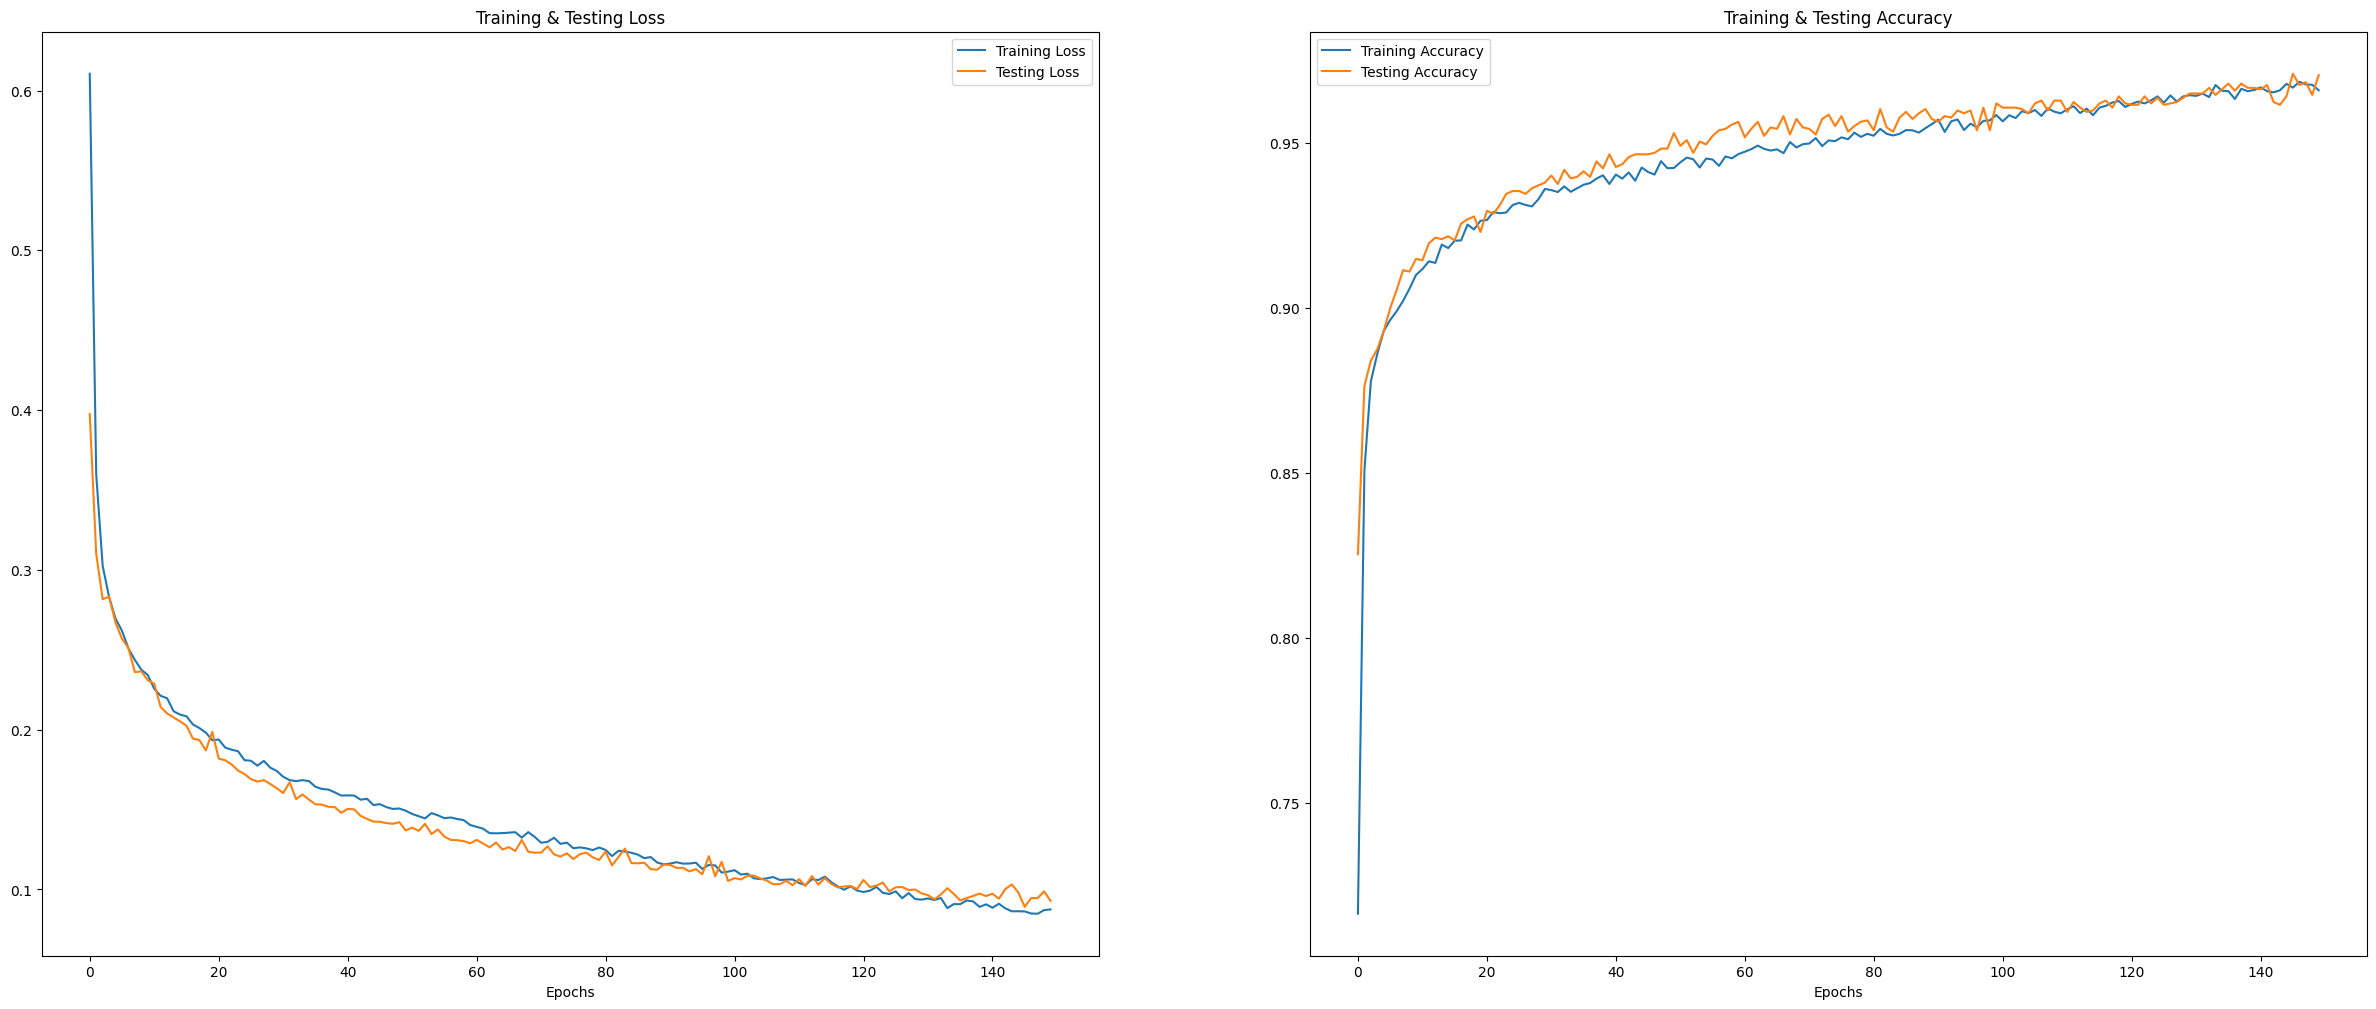

In [21]:
show_graphs(model.history)

### Model Evaluation

In [22]:
train_loss, train_acc = model.evaluate(X_train, y_train)
val_loss, val_acc = model.evaluate(X_val, y_val)
test_loss, test_acc = model.evaluate(X_test, y_test)

73/73 [==============================] - 1s 10ms/step - loss: 0.1013 - accuracy: 0.9662


In [23]:
# Make Dataframe for the results
results = pd.DataFrame(index=['Train', 'Validation', 'Test'], columns=['Loss', 'Accuracy'])
results['Loss'] = [train_loss*100, val_loss*100, test_loss*100]
results['Accuracy'] = [train_acc*100, val_acc*100, test_acc*100]

results

,Loss,Accuracy
Train,5.949496,98.201668
Validation,9.286649,97.046232
Test,10.134298,96.618152


### Finding the best Threshold Value.

In [24]:
y_pred = model.predict(X_test)

73/73 [==============================] - 1s 10ms/step


In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [26]:
accuracy_ls = []
for thres in thresholds:
    y_pred_thres = np.where(y_pred>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred_thres, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
93,0.737163,0.969606
87,0.772207,0.969606
85,0.786245,0.969178
86,0.773668,0.969178
104,0.620557,0.969178


In [27]:
y_pred_new = np.array([1 if y>=accuracy_ls.iloc[0,0] else 0 for y in y_pred]) #Threshold

In [28]:
y_train_pred = model.predict(X_train)
y_train_pred_new = np.array([1 if y>=accuracy_ls.iloc[0,0] else 0 for y in y_train_pred]) #Threshold

438/438 [==============================] - 4s 9ms/step


In [29]:
# Print training and testing accuracy
training_accuracy = accuracy_score(y_train, y_train_pred_new)
testing_accuracy = accuracy_score(y_test, y_pred_new)
print('Training Accuracy: ', training_accuracy)
print('Testing Accuracy: ', testing_accuracy)

Training Accuracy:  0.979661742667523
Testing Accuracy:  0.9691780821917808


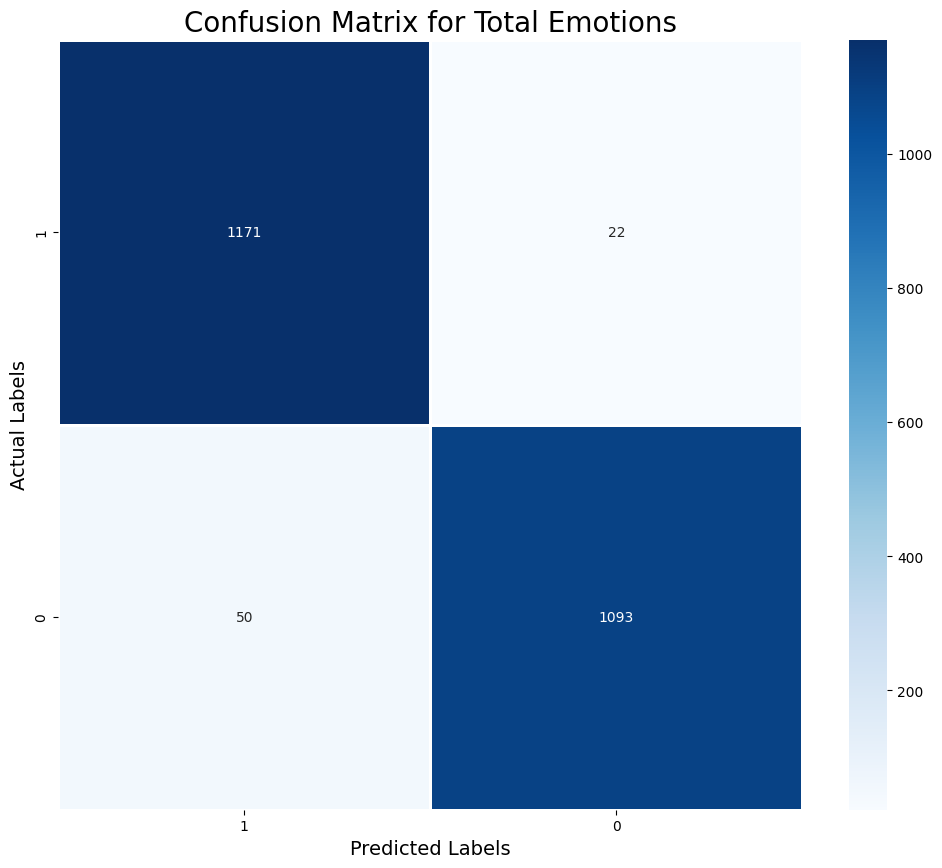

In [30]:
cm = confusion_matrix(y_test, y_pred_new)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [1,0] , columns = [1,0])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Total Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [31]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1193
           1       0.98      0.96      0.97      1143

    accuracy                           0.97      2336
   macro avg       0.97      0.97      0.97      2336
weighted avg       0.97      0.97      0.97      2336



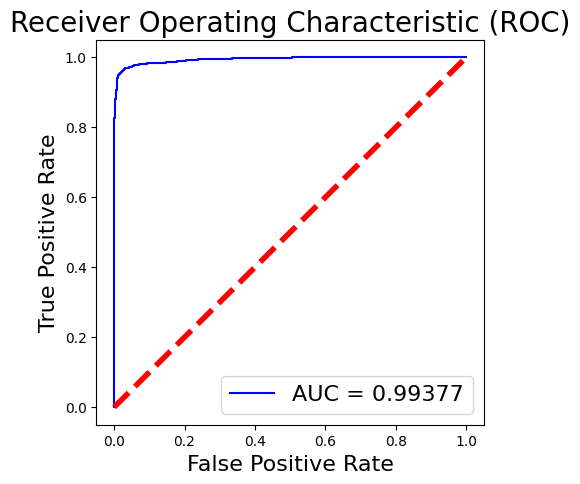

In [32]:
roc_auc = roc_auc_score(y_test,y_pred)

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic (ROC)', size=20)
plt.plot(fpr, tpr, color='blue', label='AUC = %0.5f' % roc_auc)
plt.legend(loc='lower right', prop={'size': 16})
plt.plot([0, 1], [0, 1], linestyle='--', color='red', linewidth=4, label='Random Chance')
plt.axis('tight')
plt.ylabel('True Positive Rate', size=16)
plt.xlabel('False Positive Rate', size=16)
plt.show()

### Testing

In [33]:
import librosa

In [34]:
def extract_mfcc(signal, sample_rate=22050, n_mfcc=13, n_fft=2048, hop_length=512):
    features = []
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    features.extend(np.mean(mfccs.T, axis=0))
    features.append(np.sum(np.abs(signal)**2))
    features.append(librosa.feature.rms(y=signal)[0].mean())
    features.append(np.max(np.abs(signal)))
    features.append(librosa.beat.beat_track(y=signal, sr=22050)[0])
    return np.array(features)

In [35]:
signal, sample_rate = librosa.load("denoised__non_agg_audio.wav", sr=22050)

In [36]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [37]:
model.predict(features)

1/1 [==============================] - 0s 26ms/step


array([[0.9999926]], dtype=float32)

In [38]:
signal, sample_rate = librosa.load("denoised__agg_audio.wav", sr=22050)

In [39]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [40]:
model.predict(features)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [43]:
# # Save model
# model.save('Models/cnn_model_4(pro).h5')

d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
